# Анализ 10000 самых прослушиваемых песен приложения Спотифай.

В датасете представлены данные о 10000 самых прослушиваемых песен приложения.

Описание данных:

- `Position` - Spotify Ranking
- `Artist Name` - Artist Name
- `Song Name` - Song Name
- `Days` - No of days since the release of the song (Updated)
- `Top 10 (xTimes)` - No of times inside top 10
- `Peak Position` - Peak position attained
- `Peak Position (xTimes)` - No of times Peak position attained
- `Peak Streams` - Total no of streams during Peak position
- `Total Streams ` - Total streams


Датасет взять с сайта kaggle.com - https://www.kaggle.com/datasets/rakkesharv/spotify-top-10000-streamed-songs 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:\\datasets\\Spotify_final_dataset.csv')

## Первый взгляд на таблицу и предобработка данных.

In [3]:
df.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [4]:
#переименуем столбцы

df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

In [5]:
df.columns

Index(['position', 'artist_name', 'song_name', 'days', 'top_10_(xtimes)',
       'peak_position', 'peak_position_(xtimes)', 'peak_streams',
       'total_streams'],
      dtype='object')

In [6]:
df = df.rename(columns={'top_10_(xtimes)' : 'top10_x_times', 'peak_position_(xtimes)' : 'peak_position_xtimes'})

In [7]:
df.head()

,position,artist_name,song_name,days,top10_x_times,peak_position,peak_position_xtimes,peak_streams,total_streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [8]:
df.shape

(11084, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              11084 non-null  int64  
 1   artist_name           11084 non-null  object 
 2   song_name             11080 non-null  object 
 3   days                  11084 non-null  int64  
 4   top10_x_times         11084 non-null  float64
 5   peak_position         11084 non-null  int64  
 6   peak_position_xtimes  11084 non-null  object 
 7   peak_streams          11084 non-null  int64  
 8   total_streams         11084 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 779.5+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
position,11084.0,5.542500e+03,3.199820e+03,1.0,2771.75,5542.5,8313.25,11084.0
days,11084.0,5.336693e+01,1.297509e+02,1.0,2.00,7.0,39.00,2547.0
top10_x_times,11084.0,2.713641e+00,1.560413e+01,0.0,0.00,0.0,0.00,302.0
peak_position,11084.0,8.307010e+01,5.893205e+01,1.0,29.00,75.0,132.00,200.0
peak_streams,11084.0,5.529469e+05,6.282936e+05,44323.0,243159.50,350588.5,596338.25,7786096.0
total_streams,11084.0,1.830891e+07,5.219383e+07,44323.0,382427.25,1704876.5,10783331.50,883369738.0


In [11]:
print('Количество пропусков в исходных данных: {}\n'.format(df.isna().sum()))

Количество пропусков в исходных данных: position                0
artist_name             0
song_name               4
days                    0
top10_x_times           0
peak_position           0
peak_position_xtimes    0
peak_streams            0
total_streams           0
dtype: int64



In [12]:
df.loc[df['song_name'].isnull()]

,position,artist_name,song_name,days,top10_x_times,peak_position,peak_position_xtimes,peak_streams,total_streams
5506,5507,Jenny Duncan,NaN,1,1.0,10,0,1737605,1737605
6217,6218,Dj Ozuna,NaN,6,0.0,122,0,231840,1198268
7177,7178,Daniel Marcy,NaN,1,0.0,20,0,710534,710534
8215,8216,Amy Kaylee,NaN,2,0.0,125,0,213438,412133


In [13]:
df.drop(index=[5506,6217,7177,8215], inplace=True)

In [14]:
print('Количество дубликатов: {}'.format(df.duplicated().sum()))

Количество дубликатов: 0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11080 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              11080 non-null  int64  
 1   artist_name           11080 non-null  object 
 2   song_name             11080 non-null  object 
 3   days                  11080 non-null  int64  
 4   top10_x_times         11080 non-null  float64
 5   peak_position         11080 non-null  int64  
 6   peak_position_xtimes  11080 non-null  object 
 7   peak_streams          11080 non-null  int64  
 8   total_streams         11080 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 865.6+ KB


In [16]:
df.top10_x_times = df.top10_x_times.astype('int')

In [17]:
df.peak_position_xtimes = df.peak_position_xtimes.str.replace('(', '')
df.peak_position_xtimes = df.peak_position_xtimes.str.replace(')', '')
df.peak_position_xtimes = df.peak_position_xtimes.str.replace('x', '')

In [18]:
df.head()

,position,artist_name,song_name,days,top10_x_times,peak_position,peak_position_xtimes,peak_streams,total_streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186,1,124,2905678,718865961


In [19]:
df.peak_position_xtimes = df.peak_position_xtimes.astype('int')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11080 entries, 0 to 11083
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   position              11080 non-null  int64 
 1   artist_name           11080 non-null  object
 2   song_name             11080 non-null  object
 3   days                  11080 non-null  int64 
 4   top10_x_times         11080 non-null  int32 
 5   peak_position         11080 non-null  int64 
 6   peak_position_xtimes  11080 non-null  int32 
 7   peak_streams          11080 non-null  int64 
 8   total_streams         11080 non-null  int64 
dtypes: int32(2), int64(5), object(2)
memory usage: 779.1+ KB


Предобработка завершена, можно приступать к исследовательскому анализу.

In [21]:
df.head()

,position,artist_name,song_name,days,top10_x_times,peak_position,peak_position_xtimes,peak_streams,total_streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186,1,124,2905678,718865961


In [22]:
print('В таблице представлены {}'.format(df.artist_name.nunique()),' уникальных артиста.')

В таблице представлены 1608  уникальных артиста.


In [23]:
artist_songs = (
                df
                .groupby('artist_name')['song_name'].count()
                .reset_index()
                .sort_values(by='song_name', ascending=False)
                .rename(columns={'song_name':'songs_count'})
)

In [24]:
artist_songs.head(20)

,artist_name,songs_count
391,Drake,208
500,Future,190
1371,Taylor Swift,172
843,Logic,120
1469,Trippie Redd,114
818,Lil Baby,105
726,Kanye West,91
704,Juice WRLD,91
1427,The Weeknd,90
1559,YoungBoy Never Broke Again,89


In [25]:
#имя исполнителя слишком длинное и некорректно отображается на графике 
artist_songs.artist_name = artist_songs.artist_name.str.replace('YoungBoy Never Broke Again','YoungBoy NBA')

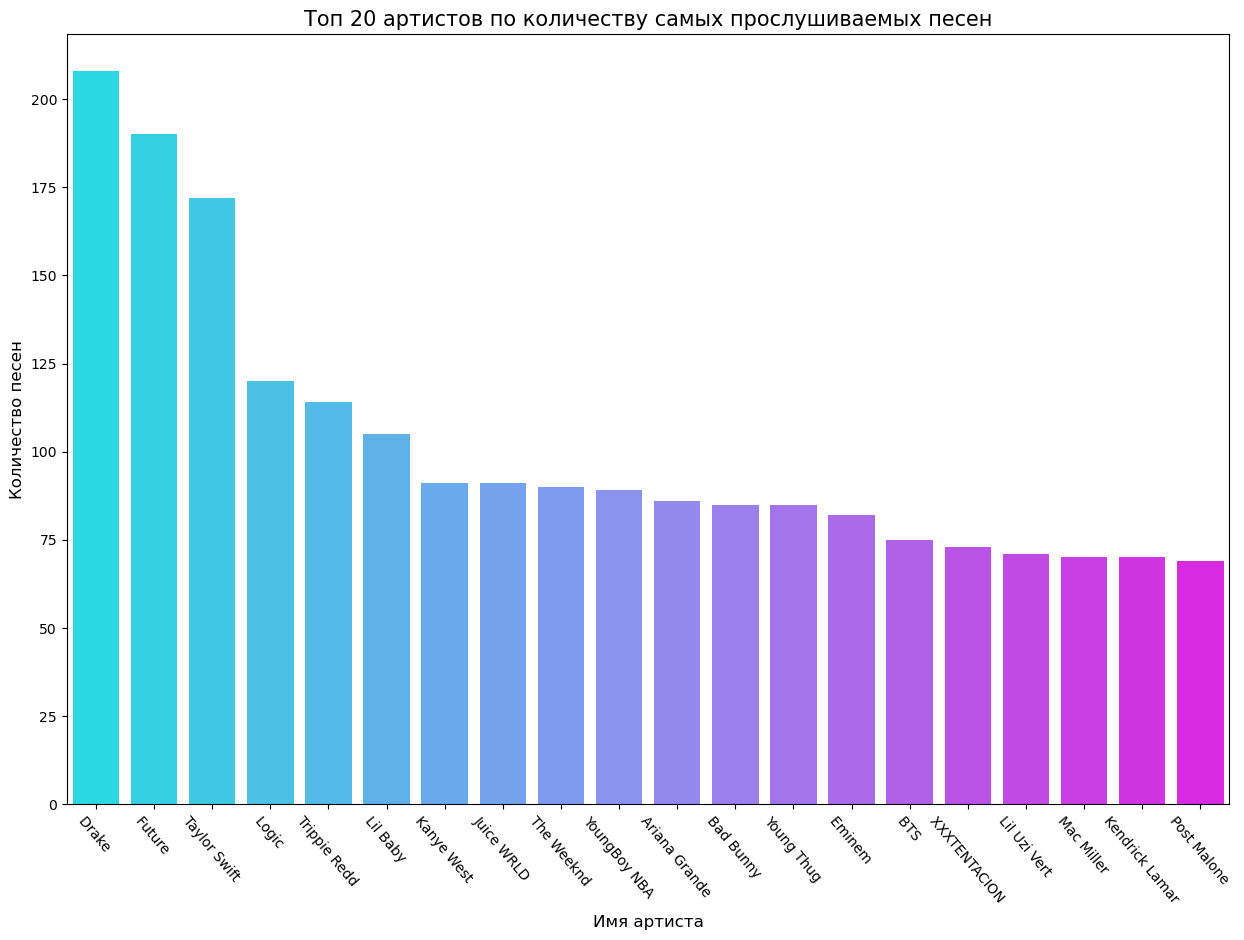

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(data=artist_songs.head(20), x='artist_name', y='songs_count', palette='cool')
plt.xlabel('Имя артиста',size=12)
plt.ylabel('Количество песен', size=12)
plt.title('Топ 20 артистов по количеству самых прослушиваемых песен', size=15)
plt.xticks(rotation=-50)
plt.show();

Drake лидирует с небольшим отрывом от Future, тройку лидеров закрывает Taylor Swift. Стоит отметить, что эта троица сильно выделяется на фоне остальных артистов.

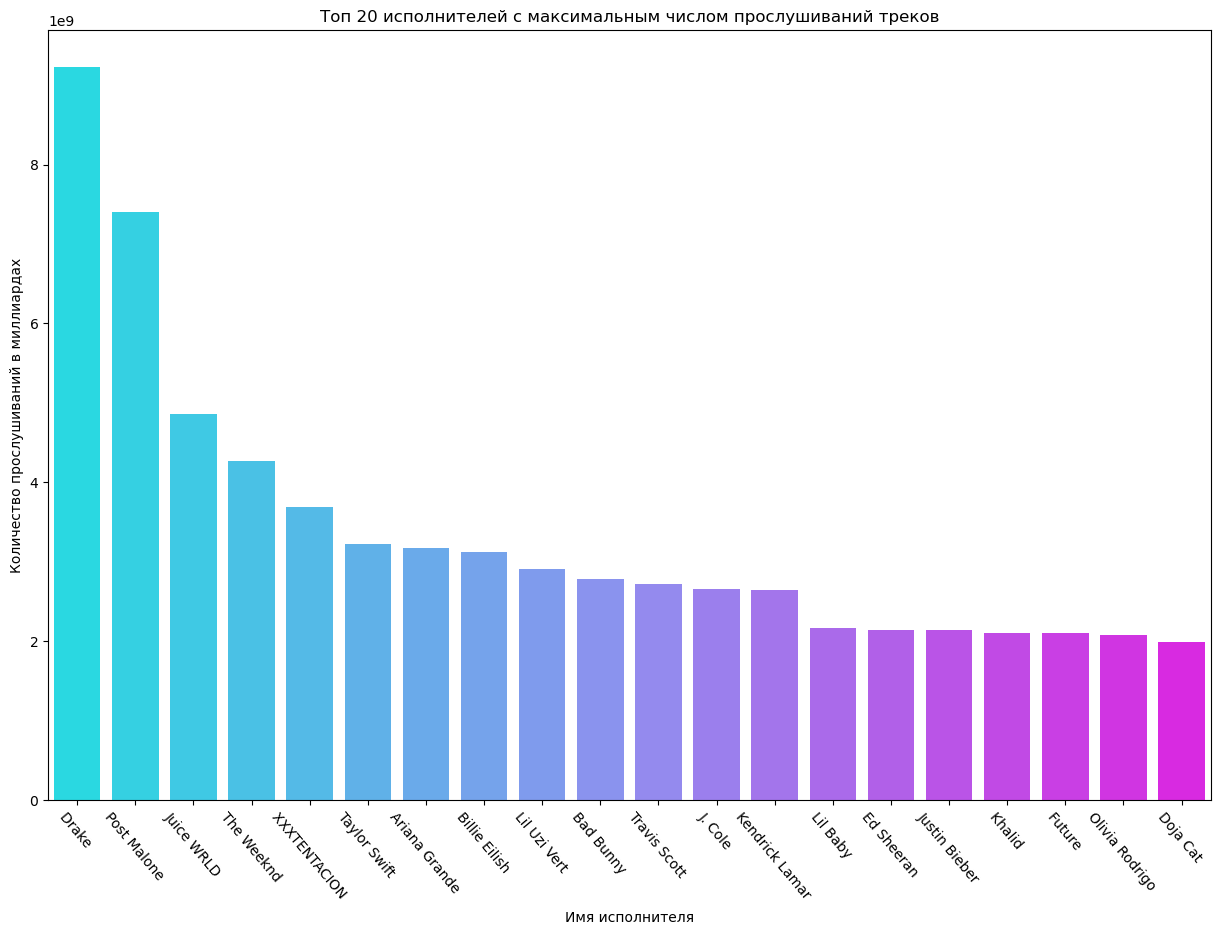

In [27]:
plt.figure(figsize=(15,10))

sns.barplot(data = df.groupby('artist_name')['total_streams'].sum().reset_index()
    .sort_values(by='total_streams', ascending=False)
    .head(20),
            x = 'artist_name',
            y='total_streams',
            palette='cool'
           )

plt.xticks(rotation=-50)
plt.title('Топ 20 исполнителей с максимальным числом прослушиваний треков')
plt.ylabel('Количество прослушиваний в миллиардах')
plt.xlabel('Имя исполнителя')
plt.show();

С общим числом прослушиваний картина немного другая, однако первую позицию все также удерживает Drake. 

In [28]:
df.head()

,position,artist_name,song_name,days,top10_x_times,peak_position,peak_position_xtimes,peak_streams,total_streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186,1,124,2905678,718865961


In [29]:
top10_times = (df
               .groupby('artist_name')['top10_x_times'].sum()
               .reset_index()
               .sort_values(by='top10_x_times', ascending=False)
               .head(20)
              )

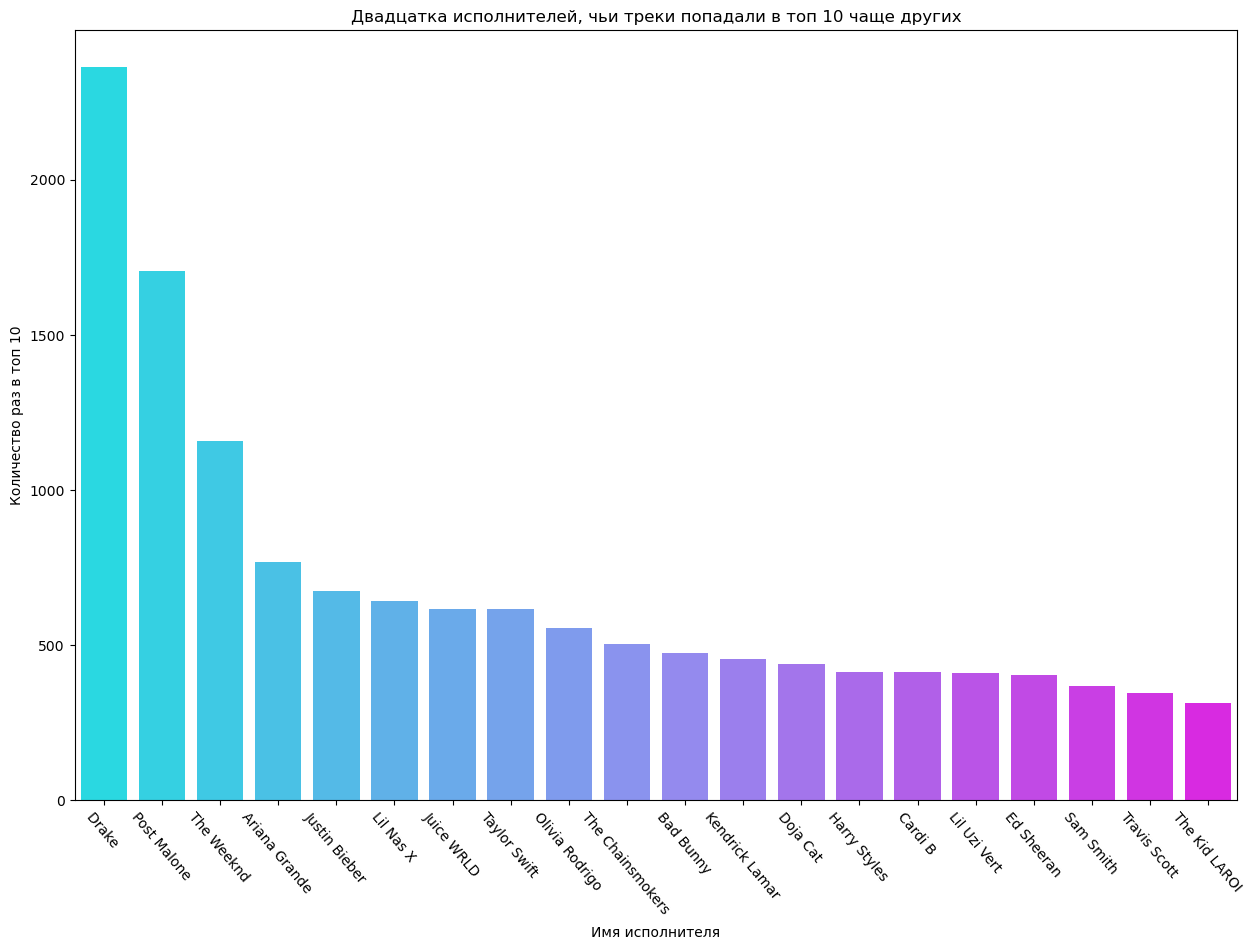

In [30]:
plt.figure(figsize=(15,10))

sns.barplot(data=top10_times,x='artist_name', y='top10_x_times', palette='cool')
plt.title('Двадцатка исполнителей, чьи треки попадали в топ 10 чаще других')
plt.xlabel('Имя исполнителя')
plt.ylabel('Количество раз в топ 10')
plt.xticks(rotation=-50)
plt.show();

Кажется, уже можно сделать вывод о том, что Drake является самым успешным артистом современности (основываясь на данных Sporify). Его треки попадали в тесятку лучших более 2 тысяч раз.

Однако стоит учитывать, что один трек может считаться десятки раз, переходя из одной позиции чарта на другую.

Взглянем на исполнителей, которые занимали первую строчку в чартах и как часто они занимали ее.

In [31]:
first_place = (
    df
    .query('peak_position == 1')
    .groupby('artist_name')['peak_position_xtimes'].sum()
    .reset_index()
    .sort_values(by='peak_position_xtimes', ascending=False)
    .rename(columns={'peak_position_xtimes':'peak_count'})
    .head(20)
)

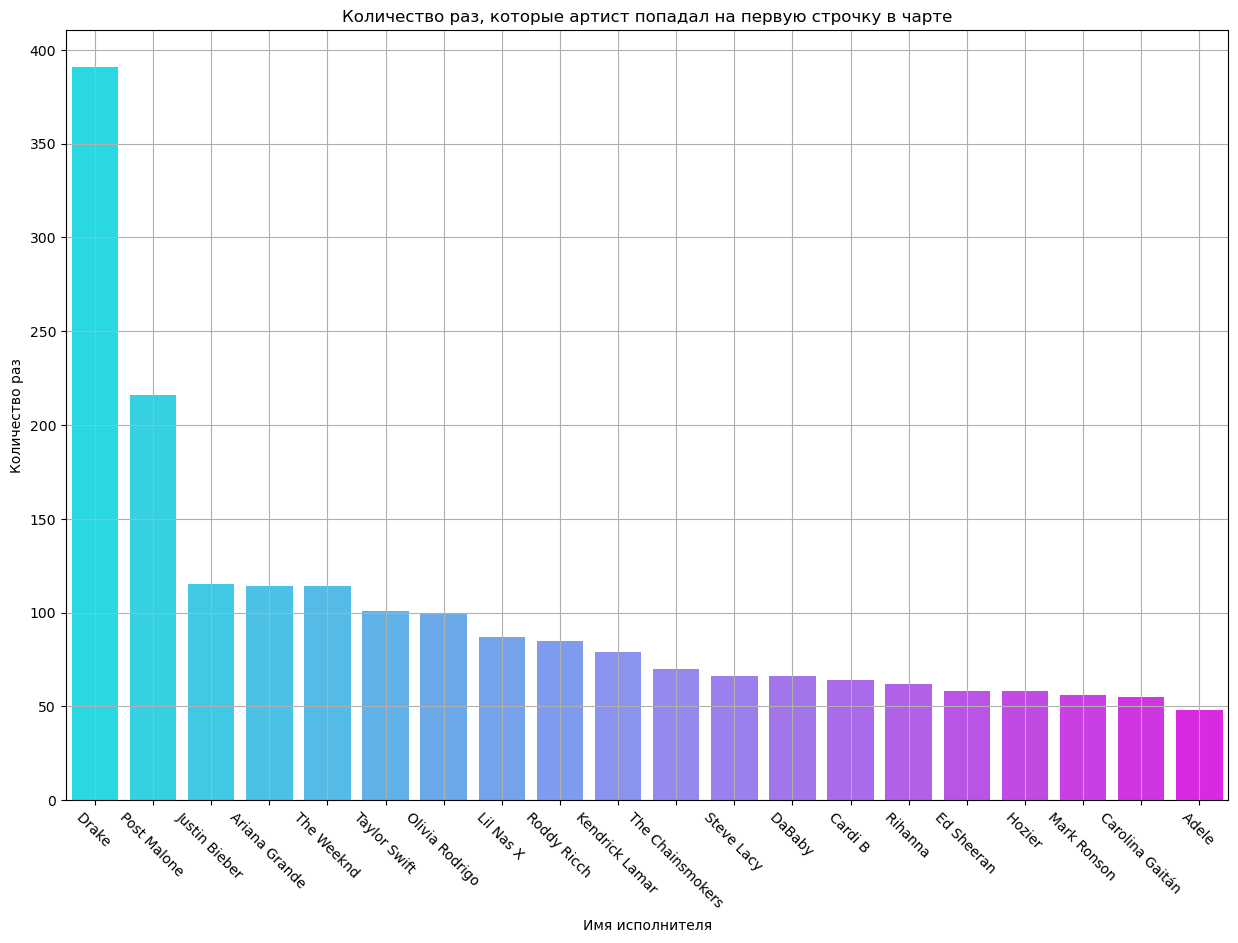

In [32]:
plt.figure(figsize=(15,10))

sns.barplot(data=first_place, x='artist_name', y='peak_count', palette='cool')
plt.title('Количество раз, которые артист попадал на первую строчку в чарте')
plt.xlabel('Имя исполнителя')
plt.ylabel('Количество раз')
plt.xticks(rotation=-45)
plt.grid(True)
plt.show();

И снова Drake уверенно занимает первую строчку, его треки попадали на первую строчку чуть меньше 400 раз. Post Malone, занимающий второе место, отстает практически в два раза. 

С успешными артистами разобрались, а что с песнями? 

In [33]:
df.head()

,position,artist_name,song_name,days,top10_x_times,peak_position,peak_position_xtimes,peak_streams,total_streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186,1,124,2905678,718865961


Выясним, какие песни имели наибольший успех: самое большое количество раз в топ 10, какое количество раз они занимали первую строчку чарта и сколько раз их слушали. 

In [34]:
top_songs = (df
             .groupby(['artist_name','song_name'])['top10_x_times'].sum()
             .reset_index()
             .sort_values(by='top10_x_times', ascending=False)
             .head(20)
            )

In [35]:
top_songs

,artist_name,song_name,top10_x_times
8011,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,302
9489,The Kid LAROI,Stay,271
5691,Lil Nas X,INDUSTRY BABY,267
3571,Glass Animals,Heat Waves,248
9579,The Weeknd,Blinding Lights,233
5898,Lil Uzi Vert,XO TOUR Llif3,212
3860,Harry Styles,As It Was,203
8387,Roddy Ricch,The Box,197
9643,The Weeknd,The Hills,194
9856,Travis Scott,SICKO MODE,190


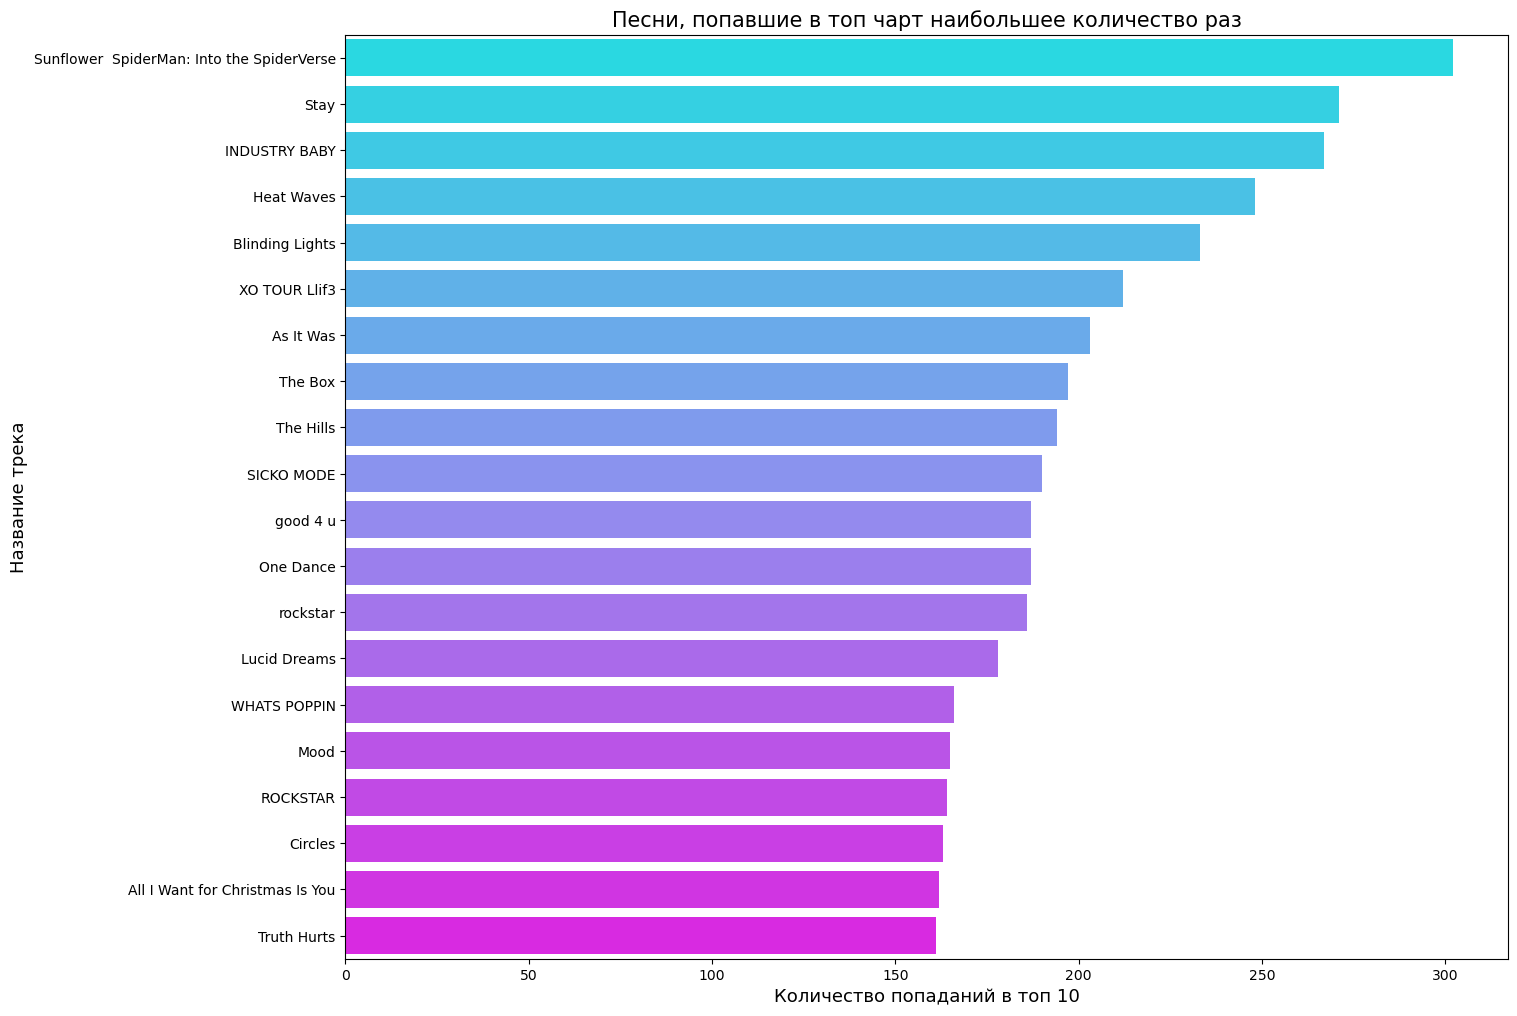

In [36]:
plt.figure(figsize=(15,12))

sns.barplot(data=top_songs, y='song_name', x='top10_x_times', palette='cool')
plt.title('Песни, попавшие в топ чарт наибольшее количество раз', size=15)
plt.xlabel('Количество попаданий в топ 10', size=13)
plt.ylabel('Название трека', size=13)
plt.show();

И первое место уходит песне Post Malone - Sunflower, она с небольшим отрывом обгоняем The Kid LAROI - Stay и Lil Nas X - INDUSTRY BABY.

In [37]:
df.head()

,position,artist_name,song_name,days,top10_x_times,peak_position,peak_position_xtimes,peak_streams,total_streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,29,2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178,1,20,2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,4,1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186,1,124,2905678,718865961


In [38]:
first_place_songs = (
    df
    .query('peak_position == 1')
    .groupby(['artist_name','song_name'])['peak_position_xtimes'].sum()
    .reset_index()
    .rename(columns={'peak_position_xtimes':'peak_count'})
    .sort_values(by='peak_count', ascending=False)
    .head(20)
)

In [39]:
first_place_songs

,artist_name,song_name,peak_count
143,Post Malone,rockstar,124
48,Drake,One Dance,103
146,Roddy Ricch,The Box,85
170,The Chainsmokers,Closer,70
41,Drake,God's Plan,70
95,Kendrick Lamar,HUMBLE.,67
156,Steve Lacy,Bad Habit,66
34,DaBaby,ROCKSTAR,65
28,Cardi B,WAP,64
145,Rihanna,Work,62


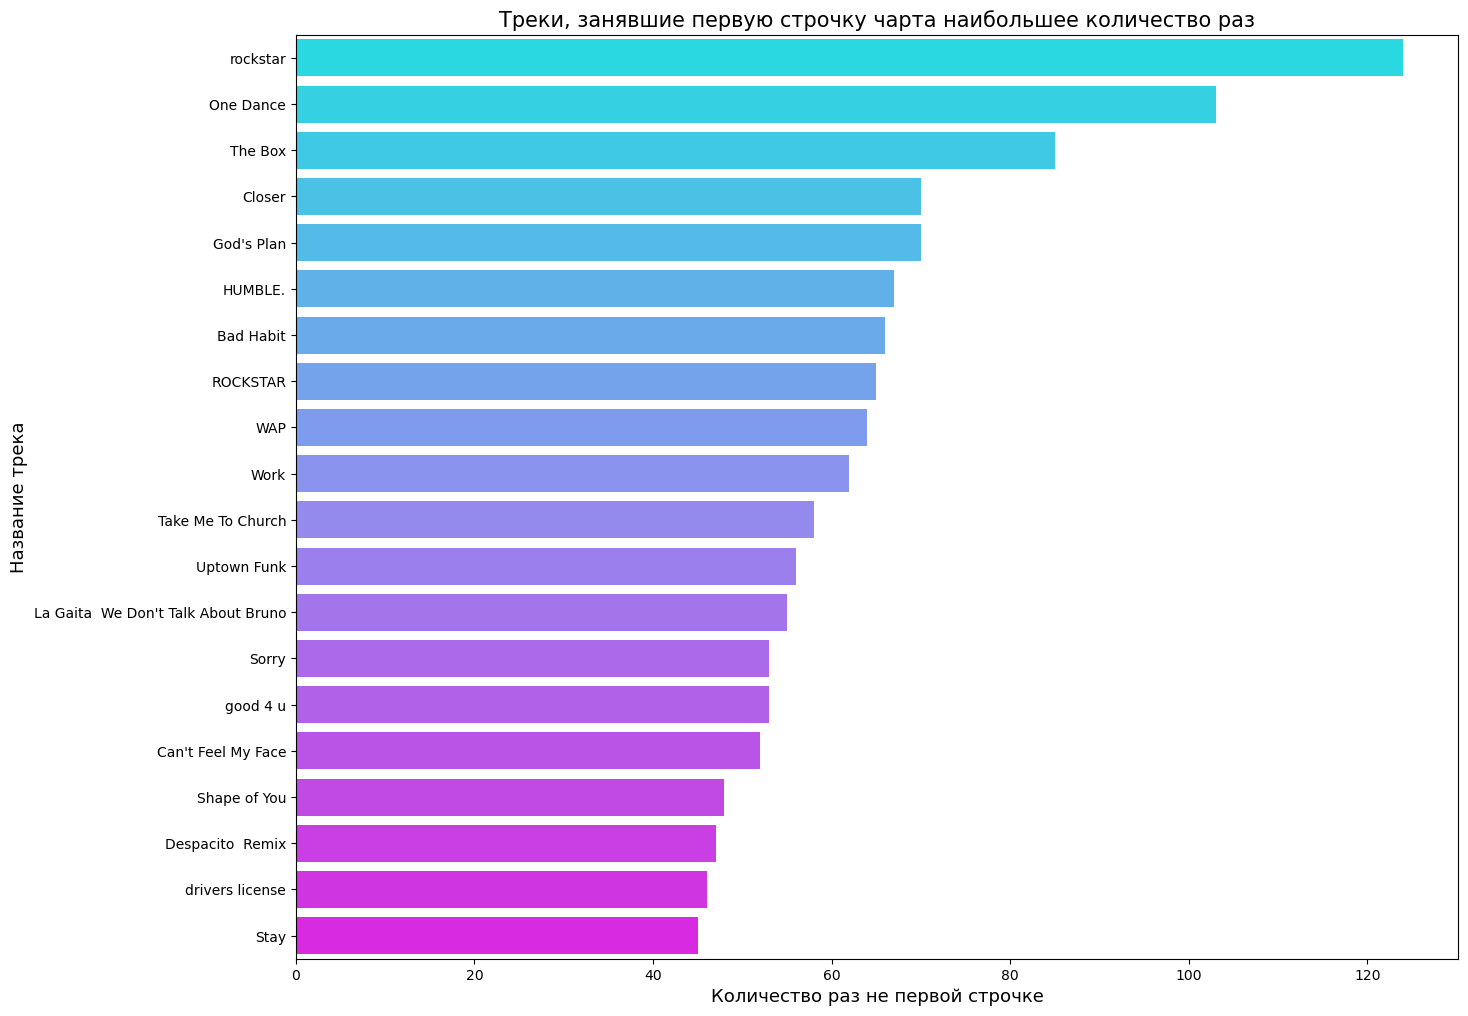

In [40]:
plt.figure(figsize=(15,12))

sns.barplot(data=first_place_songs, y='song_name', x='peak_count', palette='cool')

plt.title('Треки, занявшие первую строчку чарта наибольшее количество раз', size=15)
plt.ylabel('Название трека', size=13)
plt.xlabel('Количество раз не первой строчке',size=13)
plt.show();

И вновь первую строчка занимает Post Malone	 с песней rockstar, которая побывала на вершине чарта целых 124 раза, почетное второе место достается Drake	- One Dance, с результатом - 103. Закрывает тройку лидеров Roddy Ricch с песней The Box	- 85 раз.

In [41]:
top_stream_songs = (
    df
    .groupby(['artist_name','song_name'])['total_streams'].sum()
    .reset_index()
    .sort_values(by='total_streams', ascending=False)
    .head(20)
)

In [42]:
top_stream_songs

,artist_name,song_name,total_streams
8011,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,883369738
4622,Juice WRLD,Lucid Dreams,864832399
5898,Lil Uzi Vert,XO TOUR Llif3,781153024
4125,J. Cole,No Role Modelz,734857487
8025,Post Malone,rockstar,718865961
9867,Travis Scott,goosebumps,672972704
9579,The Weeknd,Blinding Lights,644873857
10381,XXXTENTACION,Jocelyn Flores,624457164
10398,XXXTENTACION,SAD!,619879245
4571,Juice WRLD,All Girls Are The Same,613872384


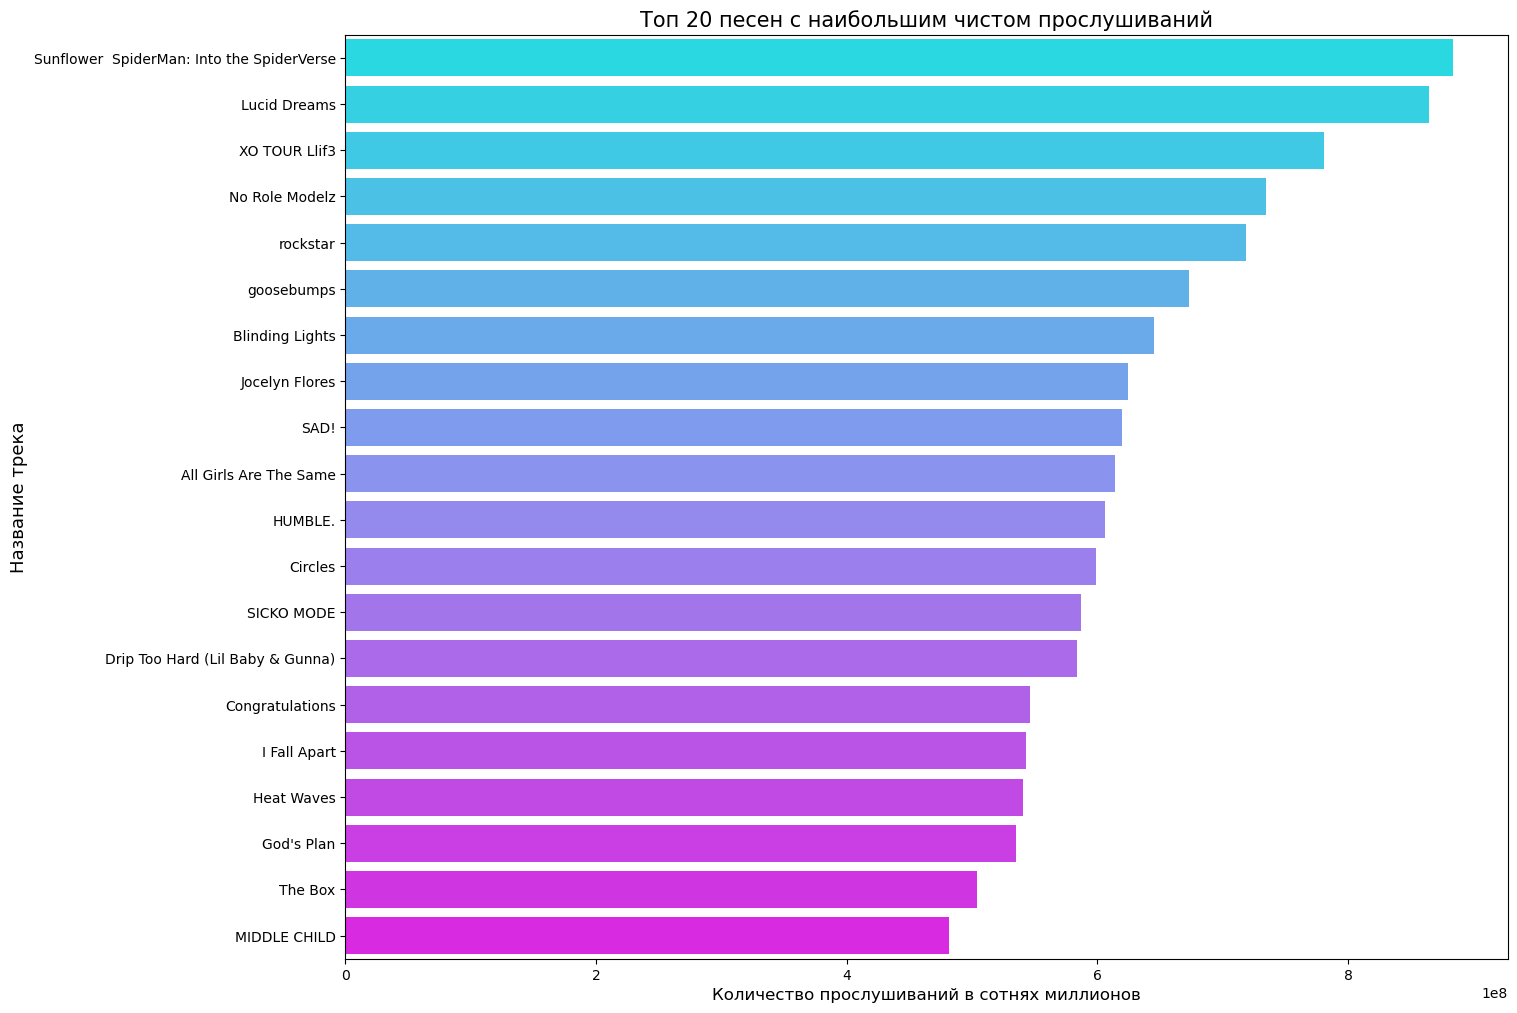

In [43]:
plt.figure(figsize=(15,12))

sns.barplot(data=top_stream_songs, y='song_name', x='total_streams', palette='cool')

plt.title('Топ 20 песен с наибольшим чистом прослушиваний',size=15)
plt.ylabel('Название трека', size=13)
plt.xlabel('Количество прослушиваний в сотнях миллионов', size=12)
plt.show()

И вновь первую строчку занимает Post Malone с треком Sunflower. На втором месте Juice WRLD - Lucid Dreams и на третьем Lil Uzi Vert	- XO TOUR Llif3.

Напоследок взглянем на матрицу корреляций.

In [44]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,position,days,top10_x_times,peak_position,peak_position_xtimes,peak_streams,total_streams
position,1.000000,-0.557412,-0.280689,0.806392,-0.175056,-0.527229,-0.505058
days,-0.557412,1.000000,0.568289,-0.378287,0.342652,0.307862,0.927895
top10_x_times,-0.280689,0.568289,1.000000,-0.237887,0.703585,0.385854,0.737556
peak_position,0.806392,-0.378287,-0.237887,1.000000,-0.148830,-0.582432,-0.375314
peak_position_xtimes,-0.175056,0.342652,0.703585,-0.148830,1.000000,0.328254,0.506054
peak_streams,-0.527229,0.307862,0.385854,-0.582432,0.328254,1.000000,0.446372
total_streams,-0.505058,0.927895,0.737556,-0.375314,0.506054,0.446372,1.000000


Изучим матрицу корреляций.

Сразу бросается в глаза сильная зависимость между общим прослушиванием песен и количеством дней с момента релиза, а так же количеством раз, которые трек побывал в десятке лучших. 

Так же сильная зависимость наблюдается между рангом исполнителя в Спотифай и пиковым местом в чартах. Попуярные артисты = популярные треки, попадающие в топ, неудивительно. И количеством раз в топ 10 и количеством раз в пике. 